<a href="https://colab.research.google.com/github/Sreejithm23/Cyberbullying_Detection/blob/main/Cyberbullying_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cyberbullying Detection**
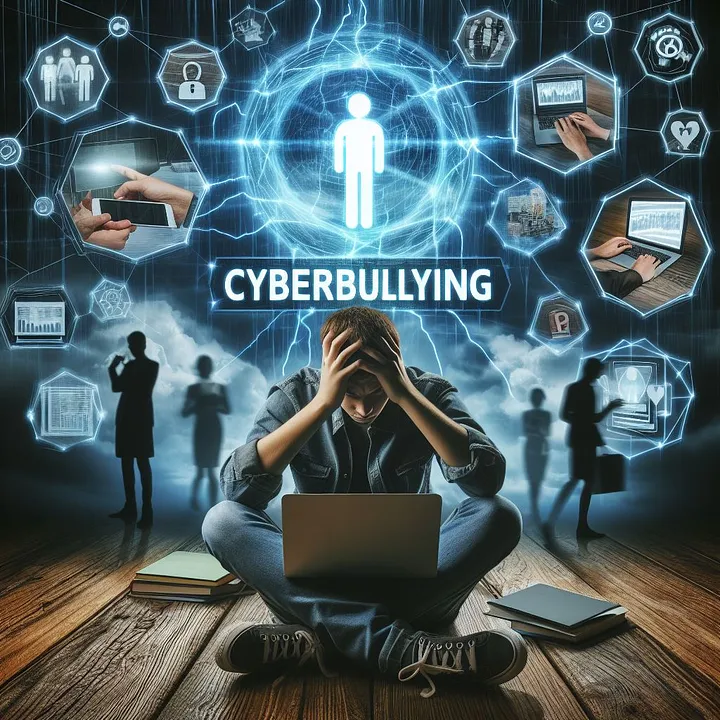

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
df=pd.read_csv('/content/drive/MyDrive/Main_Poject/Cyberattack.csv')
df

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion
...,...,...
99985,Thank fuck they didn’t dance remix Peru #LoveI...,not_cyberbullying
99986,Sierra Canyon vs. Alemany - California High Sc...,not_cyberbullying
99987,@queenbellaxoxo @PontiacMadeDDG @HalleBailey B...,gender/sexual
99988,What you like yo nigga to call you,ethnicity/race


In [ ]:
df.head()

,text,label
0,@ZubearSays Any real nigga isn't letting this ...,ethnicity/race
1,@MoradoSkittle @prolifejewess @DAConsult @Kell...,not_cyberbullying
2,"the only thing i wish, i wish a nigga would",ethnicity/race
3,You saudias are not friends of Muslim idiots c...,religion
4,@JaydenT2399 @TractorLaw @holmes_gael @erconge...,religion


In [ ]:
df.tail()

,text,label
99985,Thank fuck they didn’t dance remix Peru #LoveI...,not_cyberbullying
99986,Sierra Canyon vs. Alemany - California High Sc...,not_cyberbullying
99987,@queenbellaxoxo @PontiacMadeDDG @HalleBailey B...,gender/sexual
99988,What you like yo nigga to call you,ethnicity/race
99989,@kirkfranklin Happy CAKE DAY 🌬🎂🎁🎈🎉,not_cyberbullying


In [ ]:
df.shape

(99990, 2)

In [ ]:
#used to generate the summary of statistics of the dataset
df.describe()

,text,label
count,99990,99990
unique,99989,4
top,#NAME?,not_cyberbullying
freq,2,50000


In [ ]:
df.columns

Index(['text', 'label'], dtype='object')

In [ ]:
df.isna().sum()

text     0
label    0
dtype: int64

In [ ]:
df['label'].unique()

array(['ethnicity/race', 'not_cyberbullying', 'religion', 'gender/sexual'],
      dtype=object)

In [ ]:
df['label'].value_counts()

label
not_cyberbullying    50000
ethnicity/race       17000
gender/sexual        17000
religion             15990
Name: count, dtype: int64

# **Class Distribution Plot**

<ipython-input-17-087ef49085e4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['label'],palette=custom_palette)


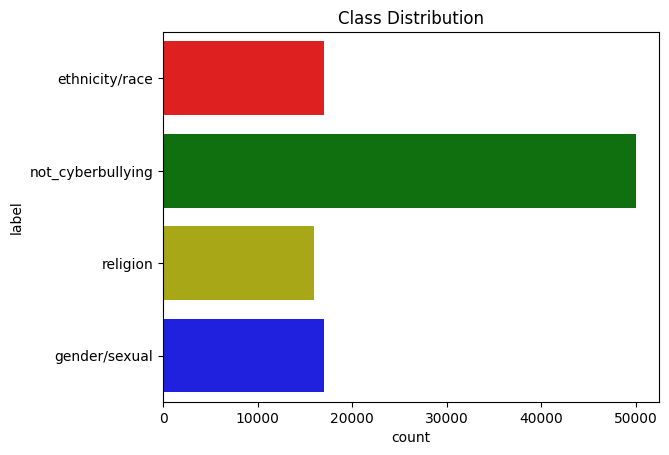

In [ ]:
custom_palette=['r', 'g', 'y', 'b']
sns.countplot(df['label'],palette=custom_palette)
plt.title('Class Distribution')
plt.show()

# **Text Length Distribution**

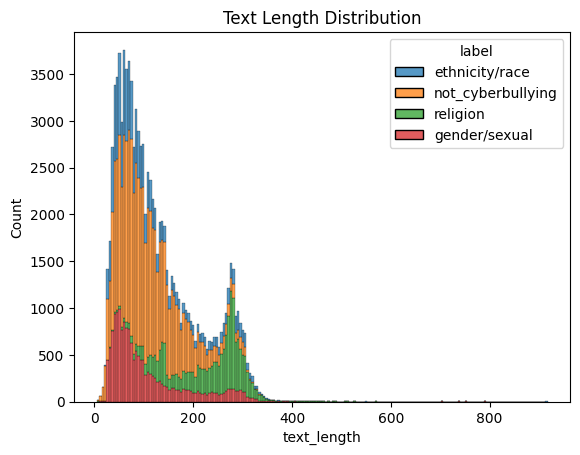

In [ ]:
df['text_length']=df['text'].apply(len)
sns.histplot(data=df, x='text_length', hue='label', multiple='stack')
plt.title('Text Length Distribution')
plt.show()

# **Word Cloud for each label**

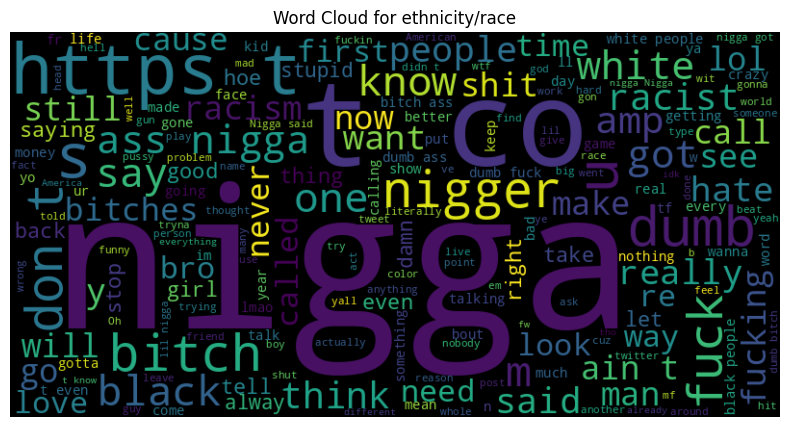

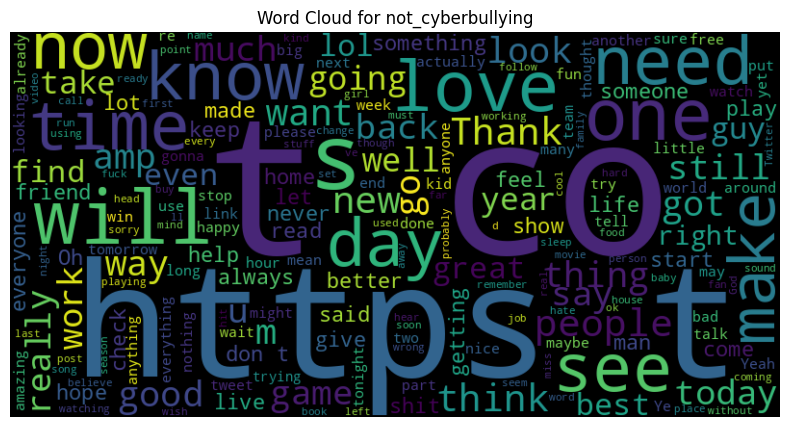

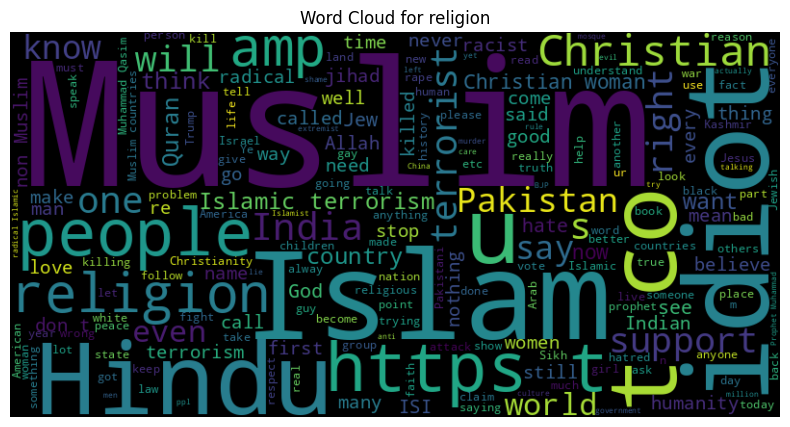

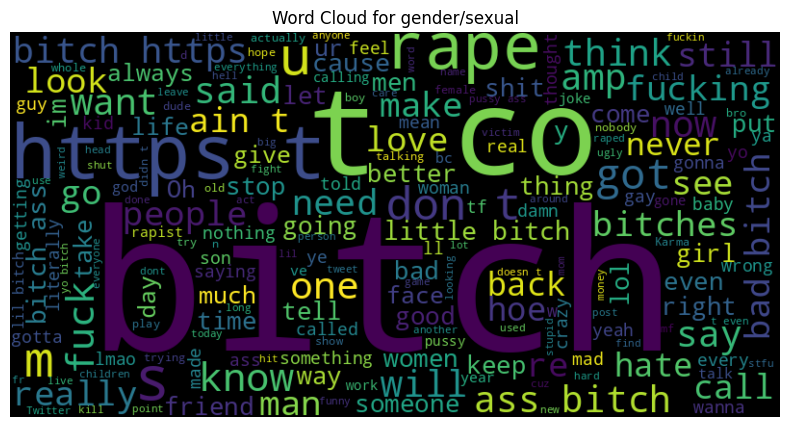

In [ ]:
from wordcloud import WordCloud
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {label}')
    plt.axis('off')
    plt.show()

# **Natural Language Processing**

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
cmnt=df.text
cmnt

0        @ZubearSays Any real nigga isn't letting this ...
1        @MoradoSkittle @prolifejewess @DAConsult @Kell...
2              the only thing i wish, i wish a nigga would
3        You saudias are not friends of Muslim idiots c...
4        @JaydenT2399 @TractorLaw @holmes_gael @erconge...
                               ...                        
99985    Thank fuck they didn’t dance remix Peru #LoveI...
99986    Sierra Canyon vs. Alemany - California High Sc...
99987    @queenbellaxoxo @PontiacMadeDDG @HalleBailey B...
99988                   What you like yo nigga to call you
99989                   @kirkfranklin Happy CAKE DAY 🌬🎂🎁🎈🎉
Name: text, Length: 99990, dtype: object

In [ ]:
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize
tk=TweetTokenizer()
cmnt=cmnt.apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
cmnt

0        @ZubearSays Any real nigga isn't letting this ...
1        @MoradoSkittle @prolifejewess @DAConsult @Kell...
2             the only thing i wish , i wish a nigga would
3        You saudias are not friends of Muslim idiots c...
4        @JaydenT2399 @TractorLaw @holmes_gael @erconge...
                               ...                        
99985    Thank fuck they didn ’ t dance remix Peru #Lov...
99986    Sierra Canyon vs . Alemany - California High S...
99987    @queenbellaxoxo @PontiacMadeDDG @HalleBailey B...
99988                   What you like yo nigga to call you
99989               @kirkfranklin Happy CAKE DAY 🌬 🎂 🎁 🎈 🎉
Name: text, Length: 99990, dtype: object

In [ ]:
import re
cmnt=cmnt.str.replace('[^a-zA-Z0-9]',' ',regex=True)
cmnt

0         ZubearSays Any real nigga isn t letting this ...
1         MoradoSkittle  prolifejewess  DAConsult  Kell...
2             the only thing i wish   i wish a nigga would
3        You saudias are not friends of Muslim idiots c...
4         JaydenT2399  TractorLaw  holmes gael  erconge...
                               ...                        
99985    Thank fuck they didn   t dance remix Peru  Lov...
99986    Sierra Canyon vs   Alemany   California High S...
99987     queenbellaxoxo  PontiacMadeDDG  HalleBailey B...
99988                   What you like yo nigga to call you
99989                kirkfranklin Happy CAKE DAY          
Name: text, Length: 99990, dtype: object

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer
cmnt=cmnt.apply(lambda x: ' '.join([w for w in tk.tokenize(x) if len(w)>=3]))
cmnt

0        ZubearSays Any real nigga isn letting this happen
1        MoradoSkittle prolifejewess DAConsult KellyYod...
2                     the only thing wish wish nigga would
3        You saudias are not friends Muslim idiots chea...
4        JaydenT 2399 TractorLaw holmes gael erconger A...
                               ...                        
99985     Thank fuck they didn dance remix Peru LoveIsland
99986    Sierra Canyon Alemany California High School G...
99987    queenbellaxoxo PontiacMadeDDG HalleBailey Bitc...
99988                         What you like nigga call you
99989                          kirkfranklin Happy CAKE DAY
Name: text, Length: 99990, dtype: object

In [ ]:
from nltk.stem import SnowballStemmer
stemer=SnowballStemmer('english')
cmnt=cmnt.apply(lambda x: [stemer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
cmnt


0             zubearsay ani real nigga isn let this happen
1        moradoskittl prolifejewess daconsult kellyyod ...
2                     the onli thing wish wish nigga would
3        you saudia are not friend muslim idiot cheaple...
4        jaydent 2399 tractorlaw holm gael ercong acyn ...
                               ...                        
99985      thank fuck they didn danc remix peru loveisland
99986    sierra canyon alemani california high school g...
99987    queenbellaxoxo pontiacmadeddg hallebailey bitc...
99988                         what you like nigga call you
99989                          kirkfranklin happi cake day
Name: text, Length: 99990, dtype: object

In [ ]:
from nltk.corpus import stopwords
words=stopwords.words('english')
cmnt=cmnt.apply(lambda x: [i for i in tk.tokenize(x) if i not in words]).apply(lambda x: ' '.join(x))
cmnt

0                      zubearsay ani real nigga let happen
1        moradoskittl prolifejewess daconsult kellyyod ...
2                         onli thing wish wish nigga would
3               saudia friend muslim idiot cheapless peopl
4        jaydent 2399 tractorlaw holm gael ercong acyn ...
                               ...                        
99985                thank fuck danc remix peru loveisland
99986    sierra canyon alemani california high school g...
99987    queenbellaxoxo pontiacmadeddg hallebailey bitc...
99988                                      like nigga call
99989                          kirkfranklin happi cake day
Name: text, Length: 99990, dtype: object

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# vec=TfidfVectorizer()
# data=vec.fit_transform(cmnt)
# data

<99990x150670 sparse matrix of type '<class 'numpy.float64'>'
	with 1171408 stored elements in Compressed Sparse Row format>

In [ ]:
cmnt.shape

(99990,)

In [ ]:
y=df['label'].values
y

array(['ethnicity/race', 'not_cyberbullying', 'ethnicity/race', ...,
       'gender/sexual', 'ethnicity/race', 'not_cyberbullying'],
      dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(cmnt,y,test_size=0.30,random_state=42)
x_train

11253          mzemek almost anyth tri prevent overtak fed
39494    interest india popul grow highest world throug...
30130                 makadiaharsh thank great inspir list
95018    isxboxstilllast mean prove new game look bette...
20638    svishnureddi rssorg vhpdigit rss deni hindu ou...
                               ...                        
6265                                         cklapp yay ad
54886             raphousetv bitch chris dat got slap live
76820    chajiizumaa near damn well scream heard first ...
860      excel academ help team essay pay law essay wri...
15795                          bitch liar https kkwiufvcuo
Name: text, Length: 69993, dtype: object

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer(max_features=50)
x_train=vec.fit_transform(x_train)
x_test = vec.transform(x_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
score_knn=accuracy_score(y_test,y_pred_knn)
print("The Accuracy Score is",score_knn)
print()
report_knn=classification_report(y_test,y_pred_knn)
print("The Classification Report is")
print(report_knn)


The Accuracy Score is 0.6808347501416808

The Classification Report is
                   precision    recall  f1-score   support

   ethnicity/race       0.81      0.40      0.53      5122
    gender/sexual       0.76      0.32      0.45      5027
not_cyberbullying       0.63      0.97      0.76     15076
         religion       0.99      0.45      0.62      4772

         accuracy                           0.68     29997
        macro avg       0.80      0.53      0.59     29997
     weighted avg       0.74      0.68      0.65     29997



In [ ]:
nb=BernoulliNB()
nb.fit(x_train,y_train)
y_pred_nb=nb.predict(x_test)
score_nb=accuracy_score(y_test,y_pred_nb)
print("The Accuracy Score for BernoulliNB is",score_nb)
print()
report_nb=classification_report(y_test,y_pred_nb)
print("The Classification Report is")
print(report_nb)

The Accuracy Score for BernoulliNB is 0.9621295462879621

The Classification Report is
                   precision    recall  f1-score   support

   ethnicity/race       0.97      0.91      0.94      5122
    gender/sexual       0.99      0.98      0.98      5027
not_cyberbullying       0.95      0.99      0.97     15076
         religion       0.95      0.91      0.93      4772

         accuracy                           0.96     29997
        macro avg       0.97      0.95      0.96     29997
     weighted avg       0.96      0.96      0.96     29997



In [ ]:
sv=SVC()
sv.fit(x_train,y_train)
y_pred_sv=sv.predict(x_test)
score_sv=accuracy_score(y_test,y_pred_sv)
print("The Accuracy Score for SVM is",score_sv)
print()
report_sv=classification_report(y_test,y_pred_sv)
print("The Classification Report is")
print(report_sv)

The Accuracy Score for SVM is 0.994032736606994

The Classification Report is
                   precision    recall  f1-score   support

   ethnicity/race       1.00      0.99      0.99      5122
    gender/sexual       1.00      1.00      1.00      5027
not_cyberbullying       0.99      1.00      1.00     15076
         religion       1.00      0.98      0.99      4772

         accuracy                           0.99     29997
        macro avg       1.00      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



In [ ]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
score_rf=accuracy_score(y_test,y_pred_rf)
print("The Accuracy Score for Random Forest is",score_rf)
print()
report_rf=classification_report(y_test,y_pred_rf)
print("The Classification Report is")
print(report_rf)


The Accuracy Score for Random Forest is 0.9937327066039937

The Classification Report is
                   precision    recall  f1-score   support

   ethnicity/race       1.00      0.99      0.99      5122
    gender/sexual       1.00      0.99      0.99      5027
not_cyberbullying       0.99      1.00      0.99     15076
         religion       1.00      0.99      0.99      4772

         accuracy                           0.99     29997
        macro avg       1.00      0.99      0.99     29997
     weighted avg       0.99      0.99      0.99     29997



In [ ]:
result={'Algorithms':['KNeighborsClassifier','BernoulliNB','SVC','Random Forest'],'Accuracy':[' 68.08 %',' 96.54 %','99.40 %','99.37 %']}
result_table=pd.DataFrame(data=result)
result_table

,Algorithms,Accuracy
0,KNeighborsClassifier,68.08 %
1,BernoulliNB,96.54 %
2,SVC,99.40 %
3,Random Forest,99.37 %


In [ ]:
st=pd.DataFrame({'text':["Arjun went to hospital"]})
command=st['text'].apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
command=command.str.replace('[^a-zA-Z0-9]',' ',regex=True)
command=command.apply(lambda x: [stemer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
command=command.apply(lambda x: [i for i in tk.tokenize(x) if i not in words]).apply(lambda x: ' '.join(x))
data=vec.transform(command)
nb.predict(data)

array(['not_cyberbullying'], dtype='<U17')

In [ ]:
st=pd.DataFrame({'text':["you are Nigga after fuck so-called your dick peace deal"]})
command=st['text'].apply(lambda x: tk.tokenize(x)).apply(lambda x:' '.join(x))
command=command.str.replace('[^a-zA-Z0-9]',' ',regex=True)
command=command.apply(lambda x: [stemer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x: ' '.join(x))
command=command.apply(lambda x: [i for i in tk.tokenize(x) if i not in words]).apply(lambda x: ' '.join(x))
data=vec.transform(command)
nb.predict(data)


array(['ethnicity/race'], dtype='<U17')

In [ ]:
# Save the trained model and vectorizer using pickle
import pickle
with open('nb.pkl', 'wb') as model_file:
    pickle.dump(nb, model_file)

with open('vec.pkl', 'wb') as vec_file:
    pickle.dump(vec, vec_file)

In [ ]:
from google.colab import files
files.download('nb.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('vec.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pickle
pickle.dump(nb,'nb.pkl','wb')

